In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('stopwords')
nltk.download('vader_lexicon')

# Unzip and read the CSV file
with zipfile.ZipFile('/content/Data LIWC 01 02 23.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/mnt/data/')

# Load dataset
df = pd.read_csv('/content/Data LIWC 01 02 23.csv.zip')

# Display the first few rows of the dataframe
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Sno,X,State,conversation_id,retweet_count,reply_count,like_count,quote_count,Buzz,id,...,i,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment
0,1,1,Assam,S1438213588544409600,0,1,1,0,3,S1438213588544409600,...,0.0,0.0,0.0,3.23,0.0,0.00,0.0,1,-2,1
1,2,2,Assam,S1438437895270846464,0,1,1,0,3,S1438437895270846464,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1,-1,0
2,3,3,Assam,S1439558164936941574,0,1,1,0,3,S1439558164936941574,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1,-2,1
3,4,4,Assam,S1439920409801945089,0,1,3,0,5,S1439920409801945089,...,0.0,0.0,0.0,0.00,0.0,2.08,0.0,1,-1,0
4,5,5,Assam,S1440221445011898371,0,1,1,0,3,S1440221445011898371,...,0.0,0.0,0.0,5.71,0.0,0.00,0.0,1,-1,0


In [ ]:
# Check for missing values and data types
df.info()

# Handle missing values if any
df = df.dropna(subset=['conversation_id'])  # Replace 'conversation_id' with the actual column name containing text data

# Convert columns to appropriate data types if necessary
df['conversation_id'] = df['conversation_id'].astype(str)  # Ensure 'conversation_id' is string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23006 entries, 0 to 23005
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sno              23006 non-null  int64  
 1   X                23006 non-null  int64  
 2   State            23006 non-null  object 
 3   conversation_id  23006 non-null  object 
 4   retweet_count    23006 non-null  int64  
 5   reply_count      23006 non-null  int64  
 6   like_count       23006 non-null  int64  
 7   quote_count      23006 non-null  int64  
 8   Buzz             23006 non-null  int64  
 9   id               23006 non-null  object 
 10  Date1            23006 non-null  object 
 11  OpnHours         23006 non-null  object 
 12  DateDay          23006 non-null  object 
 13  Day              23006 non-null  object 
 14  Time             23006 non-null  object 
 15  3-Phase          23006 non-null  object 
 16  4-phase          23006 non-null  object 
 17  Followers   

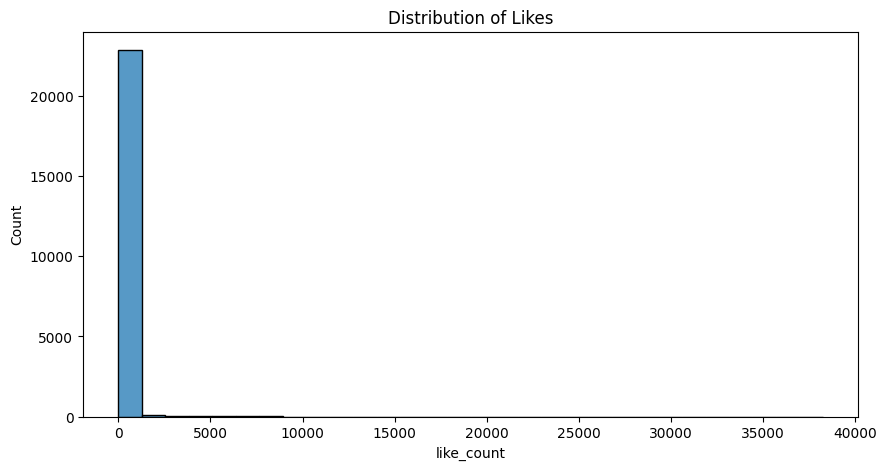

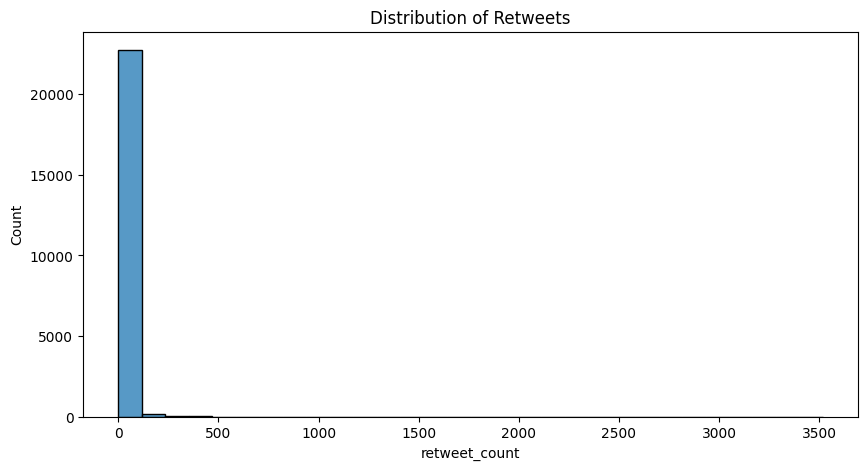

In [ ]:
# Basic statistics
df.describe()

# Visualize the distribution of engagement metrics
plt.figure(figsize=(10,5))
sns.histplot(df['like_count'], bins=30)  # Replace 'like_count' with the actual column name
plt.title('Distribution of Likes')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['retweet_count'], bins=30)  # Replace 'retweet_count' with the actual column name
plt.title('Distribution of Retweets')
plt.show()

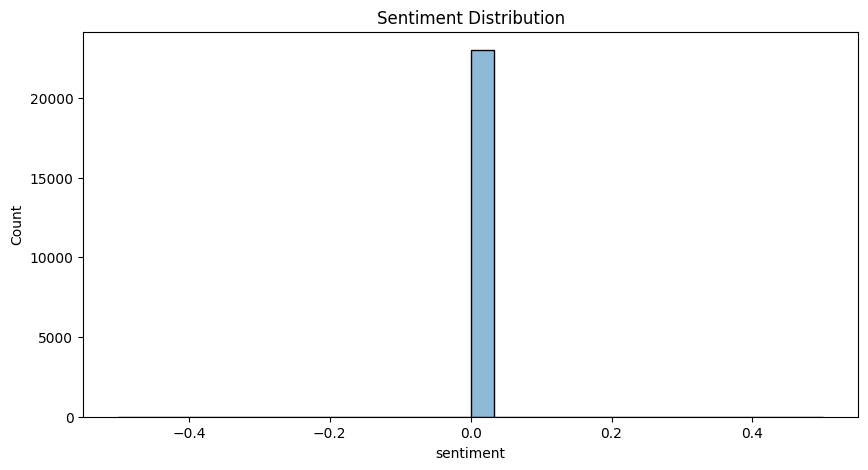

In [ ]:
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

df['sentiment'] = df['conversation_id'].apply(analyze_sentiment)  # Replace 'conversation_id' with the actual column name

# Visualize sentiment distribution
plt.figure(figsize=(10,5))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/mnt/data/Data LIWC 01 02 23.csv')

# Inspect the first few rows of the dataset
print(df.head())

# Inspect the columns to understand the structure
print(df.columns)



   Sno  X  State       conversation_id  retweet_count  reply_count  \
0    1  1  Assam  S1438213588544409600              0            1   
1    2  2  Assam  S1438437895270846464              0            1   
2    3  3  Assam  S1439558164936941574              0            1   
3    4  4  Assam  S1439920409801945089              0            1   
4    5  5  Assam  S1440221445011898371              0            1   

   like_count  quote_count  Buzz                    id  ...    i we.1 they  \
0           1            0     3  S1438213588544409600  ...  0.0  0.0  0.0   
1           1            0     3  S1438437895270846464  ...  0.0  0.0  0.0   
2           1            0     3  S1439558164936941574  ...  0.0  0.0  0.0   
3           3            0     5  S1439920409801945089  ...  0.0  0.0  0.0   
4           1            0     3  S1440221445011898371  ...  0.0  0.0  0.0   

  insight cause discrep certitude  Positive Negative Total_Sentiment  
0    3.23   0.0    0.00       0.0      

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')

# Function to preprocess text data
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = str(text)  # Convert to string
    text = re.sub(r'\W', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    words = text.lower().split()  # Convert to lowercase and split into words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Get the stop words from NLTK
stop_words = set(stopwords.words('english'))

# Assuming 'Buzz' column contains the text data; replace 'Buzz' with the correct column name
df['processed_text'] = df['Buzz'].apply(preprocess_text)

# Verify if 'processed_text' column has data
print("Number of non-empty processed text entries:", df['processed_text'].apply(lambda x: len(x) > 0).sum())

# Check some of the processed text data
print(df['processed_text'].head())


Number of non-empty processed text entries: 23006
0    3
1    3
2    3
3    5
4    3
Name: processed_text, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


       retweet_count   reply_count    like_count   quote_count
count   23006.000000  23006.000000  23006.000000  23006.000000
mean       18.857168      3.595062    139.501304      1.468660
std        61.300045     32.241142    537.268359     17.794031
min         0.000000      0.000000      0.000000      0.000000
25%         4.000000      0.000000     27.000000      0.000000
50%         9.000000      1.000000     63.000000      1.000000
75%        21.000000      3.000000    137.000000      1.000000
max      3519.000000   4580.000000  38244.000000   2546.000000


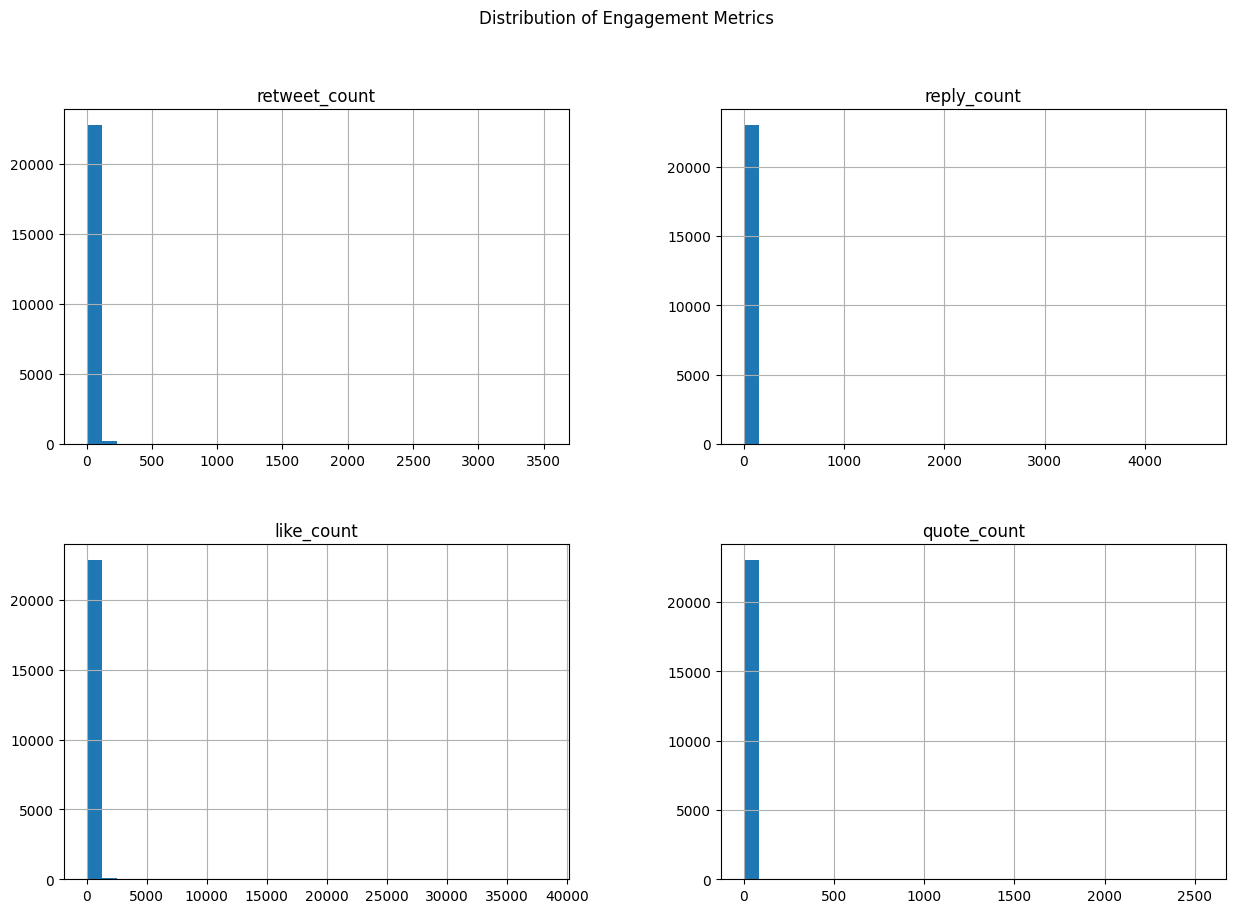

In [ ]:
# Descriptive statistics for engagement metrics
engagement_metrics = ['retweet_count', 'reply_count', 'like_count', 'quote_count']
print(df[engagement_metrics].describe())

# Plotting engagement metrics distribution
df[engagement_metrics].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Engagement Metrics')
plt.show()


count    23006.000000
mean        -0.001511
std          0.050883
min         -0.624900
25%          0.000000
50%          0.000000
75%          0.000000
max          0.636900
Name: sentiment_compound, dtype: float64


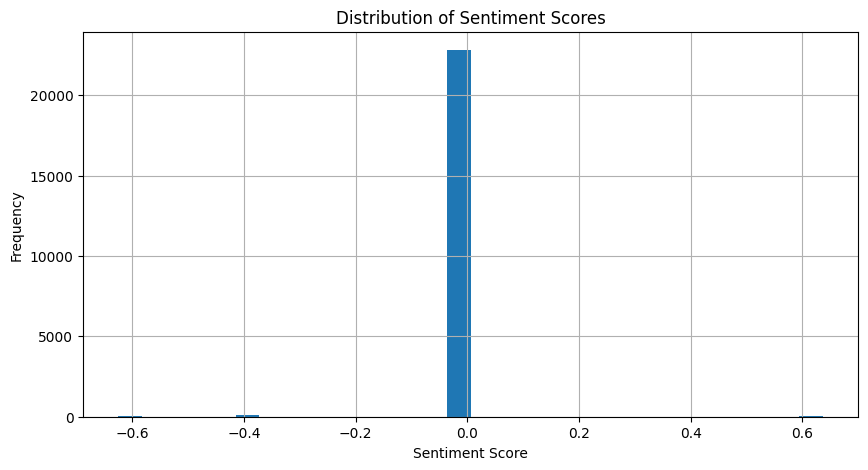

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def get_sentiment(text):
    return sid.polarity_scores(text)

# Apply sentiment analysis
df['sentiment'] = df['processed_text'].apply(get_sentiment)

# Extract compound sentiment scores
df['sentiment_compound'] = df['sentiment'].apply(lambda x: x['compound'])

# Display descriptive statistics for sentiment scores
print(df['sentiment_compound'].describe())

# Plotting sentiment distribution
plt.figure(figsize=(10, 5))
df['sentiment_compound'].hist(bins=30)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   Sno  X  State       conversation_id  retweet_count  reply_count  \
0    1  1  Assam  S1438213588544409600              0            1   
1    2  2  Assam  S1438437895270846464              0            1   
2    3  3  Assam  S1439558164936941574              0            1   
3    4  4  Assam  S1439920409801945089              0            1   
4    5  5  Assam  S1440221445011898371              0            1   

   like_count  quote_count  Buzz                    id  ...    i we.1 they  \
0           1            0     3  S1438213588544409600  ...  0.0  0.0  0.0   
1           1            0     3  S1438437895270846464  ...  0.0  0.0  0.0   
2           1            0     3  S1439558164936941574  ...  0.0  0.0  0.0   
3           3            0     5  S1439920409801945089  ...  0.0  0.0  0.0   
4           1            0     3  S1440221445011898371  ...  0.0  0.0  0.0   

  insight cause discrep certitude  Positive Negative Total_Sentiment  
0    3.23   0.0    0.00       0.0      

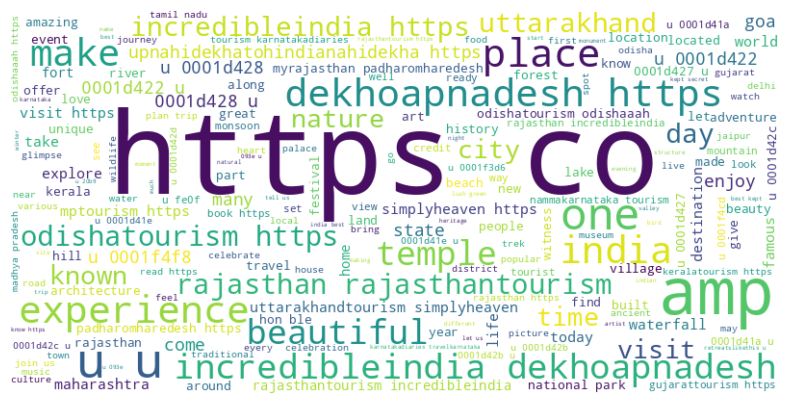

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
file_path = '/content/Data LIWC 01 02 23.csv.zip'
df = pd.read_csv(file_path)

# Display the first few rows and check column names
print(df.head())
print(df.dtypes)

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'\W', ' ', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply preprocessing to the 'Status text' column
df['processed_text'] = df['Status text'].apply(preprocess_text)

# Check if preprocessing is successful
print(df['processed_text'].head())

# Concatenate all processed text
text = ' '.join(df['processed_text'])

if text.strip():  # Check if the text is not empty
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No valid text data found to generate word cloud.")

